In the state on Maryland(MD), A state of emergency was announced on January 4, 2022 because of rise of Covid cases - leading to statewide lockdowns and impositions.[Official Mandate Link](https://governor.maryland.gov/wp-content/uploads/2022/02/End-of-State-of-Emergency.pdf)(refer to point 2 in this document).

We have plotted a graph of the number of news cases during 3 month period before and after the mandate - i.e from October 2021 to March 2022.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/Shareddrives/CSE544_Project/covid_dataset
# !ls

/content/drive/Shareddrives/CSE544_Project/covid_dataset


In [ ]:
import pandas as pd
import numpy as np

# taking maryland data
df_md = pd.read_csv("covid_md_cleaned.csv")

# Filter new_case != 0
df_md = df_md[df_md['new_case'] != 0]
use_cols = ['submission_date','new_case']
df_md = df_md[use_cols]

# Getting daily administered doses count from cumulative administered counts in MD
df_md['Percentage_fall'] = ( df_md['new_case'] - df_md['new_case'].shift(-1) ) / df_md['new_case']
df_md['Percentage_fall'] = df_md['Percentage_fall'].shift(1)
df_md.dropna(inplace = True)

In [ ]:
pcts = list(df_md['Percentage_fall'])


avg = sum(pcts) / len(pcts)
minimum = min(pcts)

# shifting data by avg + min
shift_val = abs(minimum + avg)

pcts = np.array(pcts)
pcts += shift_val

#normalizing pcts
norm = np.linalg.norm(pcts)
normal_array = pcts/norm

pcts = list(pcts)

df_md['Percentage_fall'] = pcts

In [ ]:
# Filtering dataframe by date October 2021 - March 2022

md_range_1 = df_md[(df_md['submission_date'] >= '2021-10-12') & (df_md['submission_date'] <= '2021-12-31')]
md_range_2 = df_md[(df_md['submission_date'] >= '2022-01-01') & (df_md['submission_date'] < '2022-03-31')]


# **INFERENCE**
The Graph below deontes the rise and fall of number of covid cases around the period of January 4, 2022 (Mandate date). Notice how the RED part denoting new cases before mandate falls in the BLUE part of the graph.

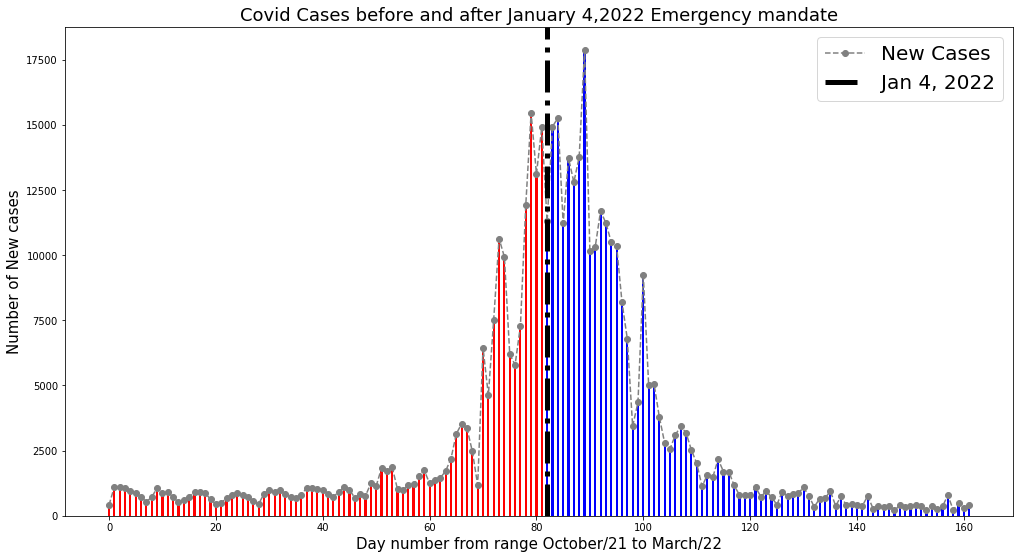

In [ ]:
#Platting graph on the data
import matplotlib.pyplot as plt

plt.figure(figsize=(17,9))

def colorIt(x):
  if x >81:
    return 'blue'
  else:
    return 'red'

x = [i for i in range(162)]
y = np.array(md_range_1['new_case'])
z = np.array(md_range_2['new_case'])
y = list(y)+list(z)
y = np.array(y)

#Plot attributes
plt.title("Covid Cases before and after January 4,2022 Emergency mandate", fontsize = 18)
plt.plot(x,y,linestyle='--', marker='o', color='grey', label='New Cases')
for x0, y0 in zip(x,y):
  plt.bar(x0,y0, width = 0.4, color=colorIt(x0))
plt.axvline(82, ls = '-.', color = 'black', linewidth = 5, label = "Jan 4, 2022")
plt.xlabel("Day number from range October/21 to March/22", fontsize = 15)
plt.ylabel("Number of New cases", fontsize = 15)

plt.legend(loc='best', prop = {"size":20})

In [ ]:
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic &> /dev/null
!jupyter nbconvert --to pdf /content/drive/Shareddrives/CSE544_Project/Exploratory/exploratory-Q2-Inference.ipynb  &> /dev/null